In [1]:
# импорт библиотек
import cv2
from IPython.display import Image
import numpy as np

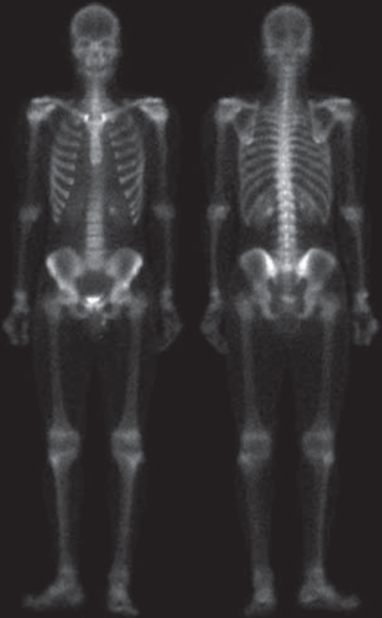

In [2]:
# загрузка изображения
img = cv2.imread("skeleton2.png", cv2.IMREAD_GRAYSCALE)
Image(filename="skeleton2.png")

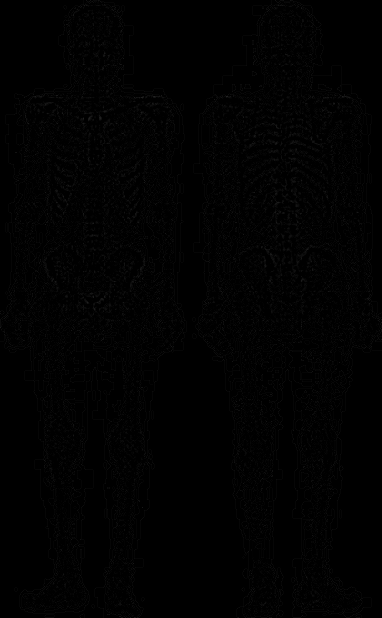

In [3]:
# шаг 1: применяем оператор лапласиан
step1 = cv2.Laplacian(img, cv2.CV_64F)
cv2.imwrite("step1.png", step1)
Image(filename="step1.png")

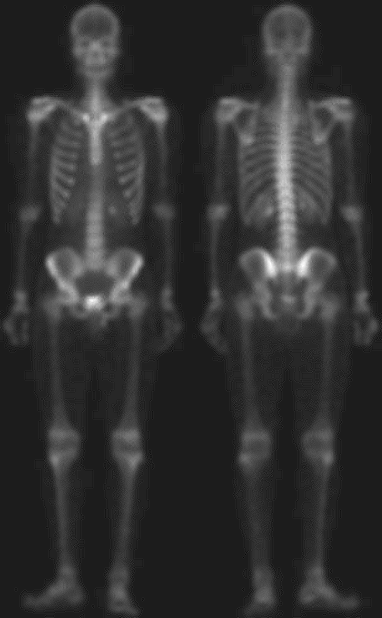

In [4]:
# шаг 2: складываем результат шага 1 к исходному, чтобы увеличить резкость
step2 = cv2.add(img, step1, dtype=cv2.CV_64F)
cv2.imwrite("step2.png", step2)
Image(filename="step2.png")

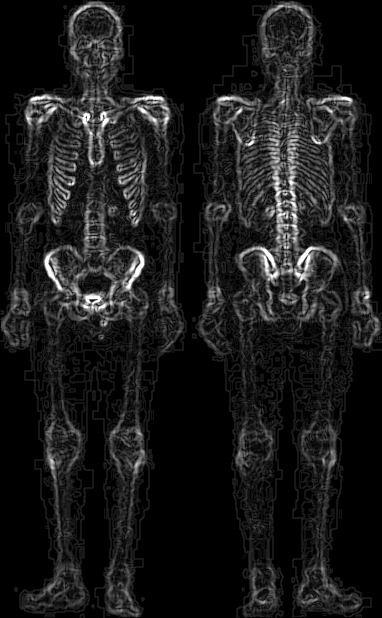

In [5]:
# шаг 3: применяем градиентный оператор Собеля
sobel1 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel2 = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
step3 = cv2.add(np.absolute(sobel1), np.absolute(sobel2))
cv2.imwrite('step3.png', step3)
Image(filename="step3.png")

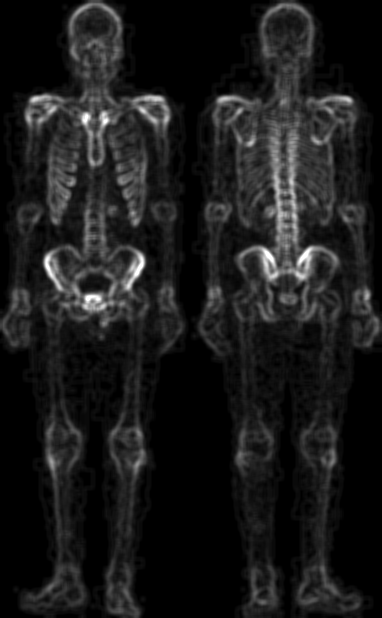

In [6]:
# шаг 4: сглаживаем результат оператора Собеля
step4 = cv2.blur(step3, (5, 5))
cv2.imwrite("step4.png", step4)
Image(filename="step4.png")

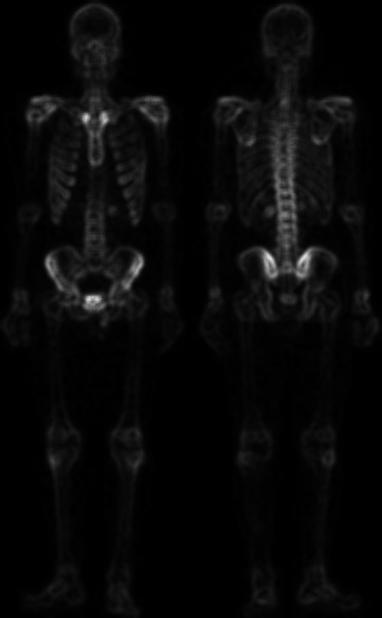

In [7]:
# шаг 5: перемножаем результаты операторов Лапласа и Собеля
step4_new = step4 / 255
step5 = cv2.multiply(step2, step4_new, dtype=cv2.CV_64F)
cv2.imwrite('step5.png', step5)
Image(filename="step5.png")

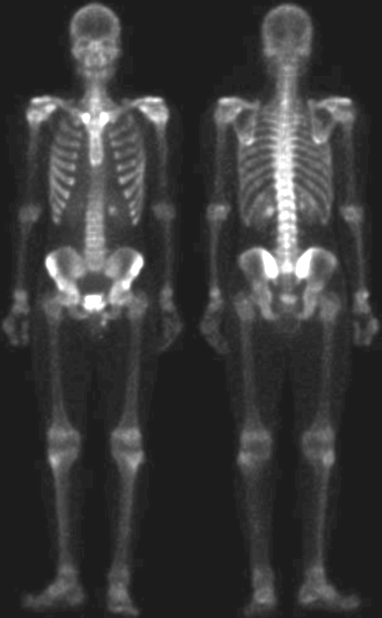

In [8]:
# шаг 6: складываем исходное изображение и результат операторов
step6 = cv2.add(img, step5, dtype=cv2.CV_64F)
cv2.imwrite("step6.png", step6)
Image(filename="step6.png")

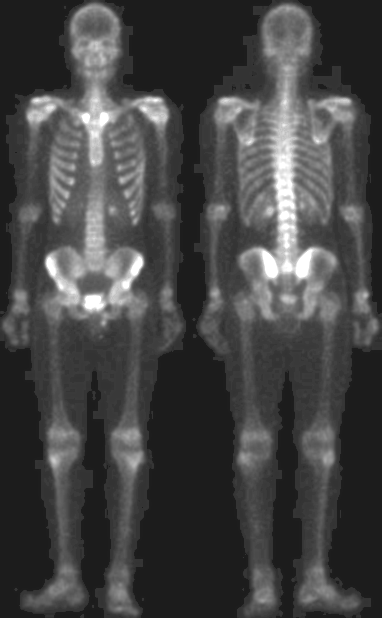

In [34]:
# шаг 7: градационная коррекция
step6_new = np.zeros((len(step6), len(step6[0])))
for i in range(len(step6)):
    for j in range(len(step6[0])):
        if step6[i][j] < 30 or step6[i][j] > 192:
            step6_new[i][j] = step6[i][j]
        else:
            step6_new[i][j] = 255 * (step6[i][j] / 255) ** 0.8
step7 = step6_new
cv2.imwrite('step7.png', step7)
Image(filename="step7.png")